# 1 Show your Data with Python

The 'show your data' stack is essential for other tutorials here. Nearly all other tutorials will require some knowledge from this page.

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()


Matplotlib and numpy with line parameters

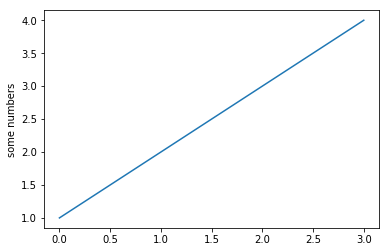

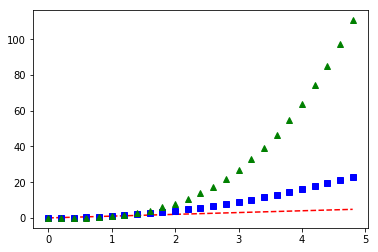

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()


Text inside a plot

/home/sashbot/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


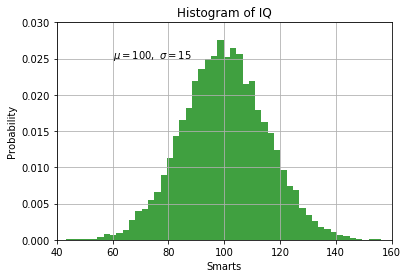

In [9]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

More Textfeatures

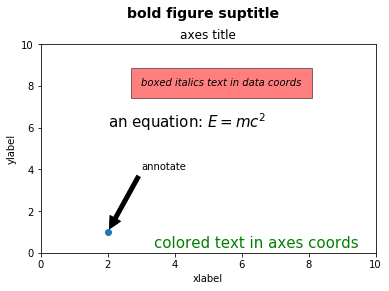

In [11]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

Other example

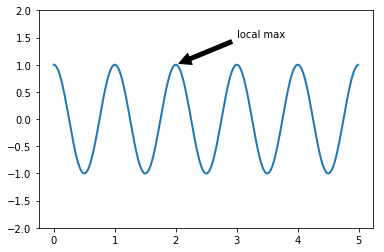

In [12]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

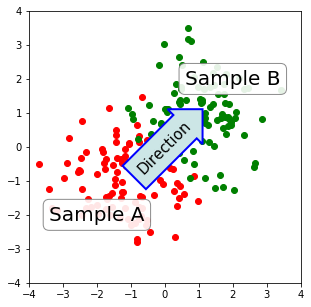

In [14]:
fig = plt.figure(1, figsize=(5,5))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + np.random.randn(100)
y1 = -1 + np.random.randn(100)
x2 = 1. + np.random.randn(100)
y2 = 1. + np.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)


bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.draw()
plt.show()

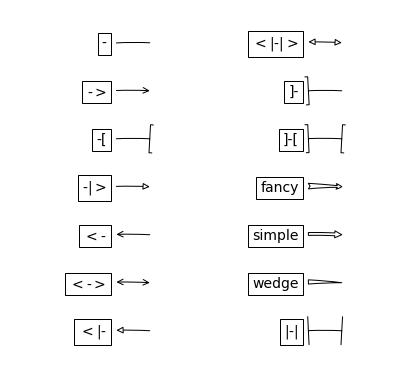

In [20]:
import matplotlib.patches as mpatches

styles = mpatches.ArrowStyle.get_styles()

ncol=2
nrow = (len(styles)+1) // ncol
figheight = (nrow+0.5)
fig1 = plt.figure(1, (4.*ncol/1.5, figheight/1.5))
fontsize = 0.2 * 70


ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4*ncol)
ax.set_ylim(0, figheight)

def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s

for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i//nrow)*4
    y = (figheight - 0.7 - i%nrow) # /figheight
    p = mpatches.Circle((x, y), 0.2, fc="w")
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x-1.2, y),
                #xycoords="figure fraction", textcoords="figure fraction",
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="w", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)



plt.draw()
plt.show()

Patches

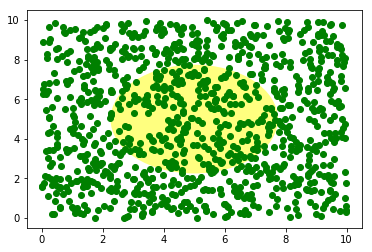

In [21]:
import matplotlib.patches as patches
fig = plt.figure()
ax = fig.add_subplot(111)
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go')  # plot some data in data coordinates

circ = patches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                      facecolor='yellow', alpha=0.5)
ax.add_patch(circ)

plt.show()

Bezier curves //TODO Intro what Bezier curves are

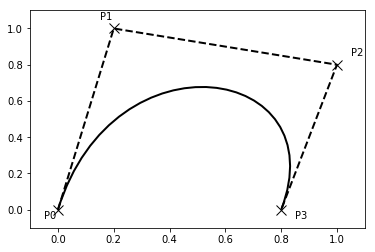

In [23]:
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.),  # P0
    (0.2, 1.), # P1
    (1., 0.8), # P2
    (0.8, 0.), # P3
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
ax.plot(xs, ys, 'x--', lw=2, color='black', ms=10)

ax.text(-0.05, -0.05, 'P0')
ax.text(0.15, 1.05, 'P1')
ax.text(1.05, 0.85, 'P2')
ax.text(0.85, -0.05, 'P3')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

Further Tutorials about Advanced 2D Plotting in Python

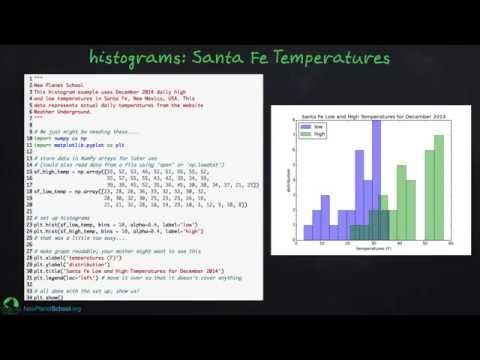

In [25]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('in8LJ-aR8T8')